## Importing the Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Loading the Dataset

In [63]:
file_path = r"C:\Users\nanda\OneDrive\Desktop\Afame Technologies\Movie dataset.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

## Exploratory Data Analysis (EDA)

In [65]:
print(df.head())
print(df.info())
print(df.describe())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

## Data Cleaning

In [67]:
df = df.dropna()

In [68]:
# Fill missing ratings with the mean rating
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

# Convert 'Votes' to numerical by removing commas
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

# Convert 'Duration' to numerical (in minutes)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

# Handle missing values in categorical columns
df['Genre'] = df['Genre'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')
df['Actor 1'] = df['Actor 1'].fillna('Unknown')
df['Actor 2'] = df['Actor 2'].fillna('Unknown')
df['Actor 3'] = df['Actor 3'].fillna('Unknown')


## Data Preprocessing

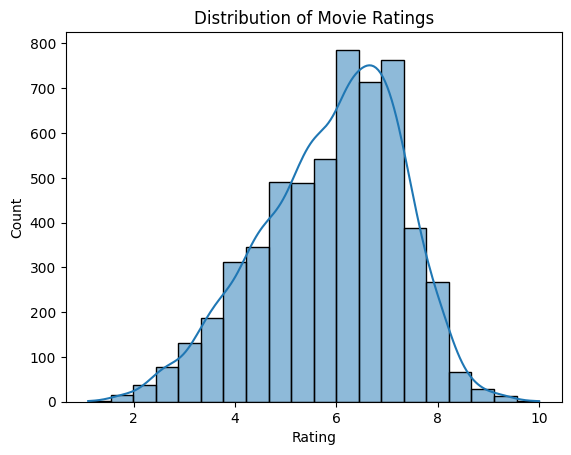

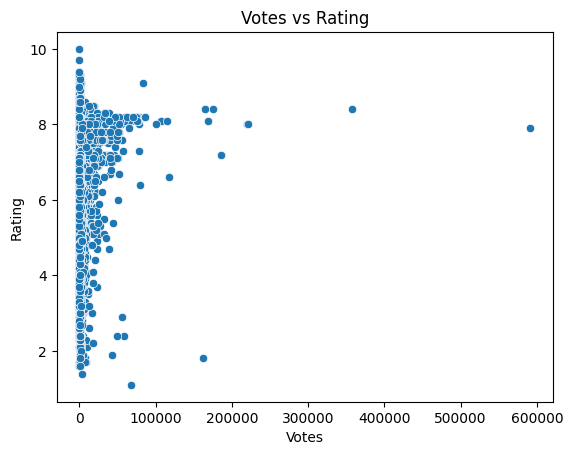

In [70]:
# Distribution of ratings
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()

# Scatter plot of votes vs rating
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Votes vs Rating')
plt.show()


In [71]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

# Display the first few rows of the transformed dataset
print(df.head())


                                 Name    Year  Duration  Rating   Votes  \
1  #Gadhvi (He thought he was Gandhi)  (2019)     109.0     7.0     8.0   
3                             #Yaaram  (2019)     110.0     4.4    35.0   
5                ...Aur Pyaar Ho Gaya  (1997)     147.0     4.7   827.0   
6                           ...Yahaan  (2005)     142.0     7.4  1086.0   
8                  ?: A Question Mark  (2012)      82.0     5.6   326.0   

   Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
1                    False                               False   
3                    False                               False   
5                    False                               False   
6                    False                               False   
8                    False                               False   

   Genre_Action, Adventure, Comedy  Genre_Action, Adventure, Crime  \
1                            False                           False   
3           

## Feature Selection

In [73]:
X = df.drop(columns=['Rating', 'Name', 'Year'])
y = df['Rating']

## Splitting the Data

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initializing the Model 

In [77]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluating the Model

In [79]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.532871323321555
R-squared: 0.17220111621597278
